In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random

In [2]:
import glob

In [3]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [65]:
# files_name

In [4]:
data_i = 0
fits_file = files_name[data_i]

In [15]:
fits_file

'../../data/fits\\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits'

In [5]:
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: ../../data/fits\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1027   ()      
  1  SCI           1 ImageHDU        83   (5810, 5802)   float32   
  2  WHT           1 ImageHDU        44   (5810, 5802)   float32   
  3  CTX           1 ImageHDU        37   (5810, 5802)   int32   
  4  HDRTAB        1 BinTableHDU    638   16R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D

In [6]:
image_data = hdu_list['SCI'].data

In [7]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: nan
Max: nan
Mean: nan
Stdev: nan


In [8]:
# filp the image to origin side
# this will help the image performance as a original image in DS9
image_data = np.flipud(image_data)

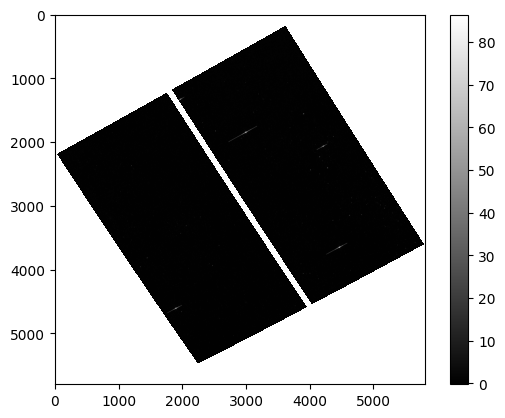

In [9]:
plt.imshow(image_data, cmap='gray')
# plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [10]:
image_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [11]:
imgs_arr_scaled = image_data.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = 0

In [12]:
imgs_arr_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Normalize Data

In [13]:
def normalize(data, lower=0, upper=255):
    return ((data - data.min()) / (data.max() - data.min())) * (upper - lower) + lower

In [14]:
normalize_img = normalize(imgs_arr_scaled)

In [15]:
print('Min:', np.min(normalize_img))
print('Max:', np.max(normalize_img))
print('Mean:', np.mean(normalize_img))
print('Stdev:', np.std(normalize_img))

Min: 0.0
Max: 255.0
Mean: 1.2666558
Stdev: 2.9543617


# FITS to jpg

In [78]:
# !!! must be invert the image y axis

In [3]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import cv2
import numpy as np

In [80]:
# ref how to save FITS to JPG
# https://stackoverflow.com/questions/72707325/how-to-save-jpegs-of-fits-files

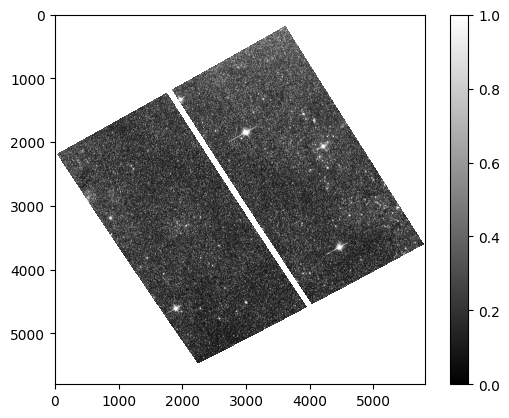

In [14]:
data = fits.getdata(fits_file)
data = np.flipud(data)
zscale = ZScaleInterval()
plt.imshow(zscale(data), cmap="gray")
# plt.savefig("../data/jpg/global_F814W/{}.jpg".format(data_i))
plt.colorbar()
# plt.show()
# plt.close()

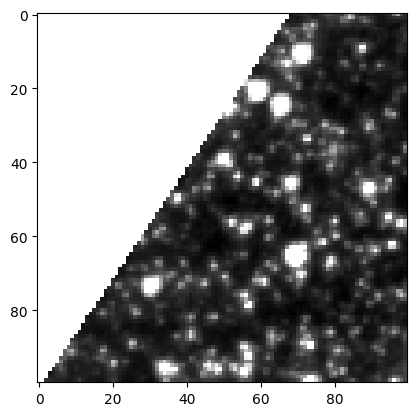

In [18]:
# flip zscale(data) by from arr[::-1]
# this will help the image performance as a original image in DS9
plt.imshow(zscale(data)[::-1][2000:2000+100, 1000:1000+100], cmap="gray")


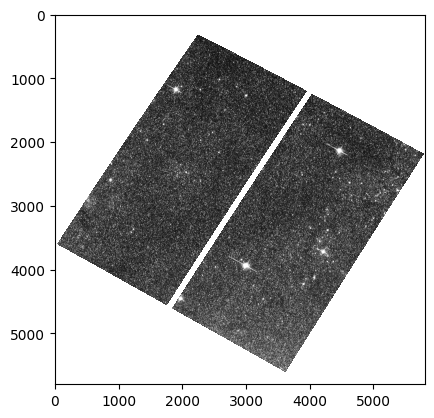

In [16]:
# flip zscale(data) by flippedImages then display
flippedImages = np.flipud(zscale(data))
plt.imshow(flippedImages, cmap="gray")


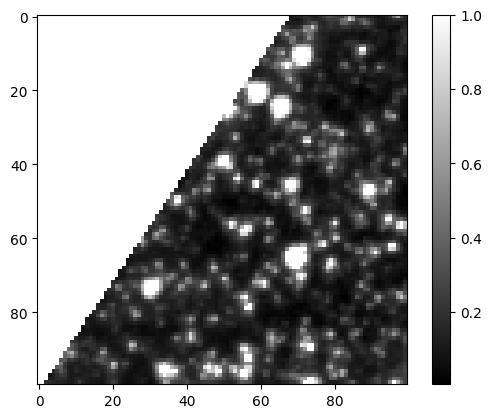

In [84]:
# display the image by flip vertical with inverte y-axis
imgY = np.flip((zscale(data)), axis=0)
plt.imshow(imgY[2000:2000+100, 1000:1000+100], cmap="gray")
plt.colorbar()

In [21]:
imgY[2000:2000+100, 1000:1000+100]

array([[       nan,        nan,        nan, ..., 0.63320816, 0.30202213,
        0.17818817],
       [       nan,        nan,        nan, ..., 0.19271195, 0.1778663 ,
        0.16450723],
       [       nan,        nan,        nan, ..., 0.12503888, 0.10604276,
        0.1177406 ],
       ...,
       [       nan,        nan,        nan, ..., 0.21695735, 0.22529802,
        0.26144737],
       [       nan,        nan,        nan, ..., 0.38925064, 0.30522197,
        0.25826678],
       [       nan,        nan, 0.19324419, ..., 0.66764957, 0.42270902,
        0.27791956]], dtype=float32)

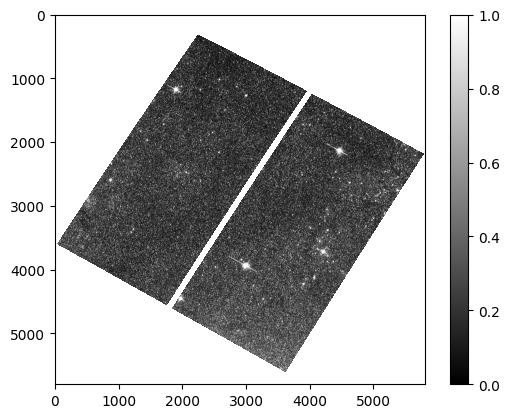

In [17]:
# display the image by flip vertical with inverte y-axis
imgY = np.flip((zscale(data)), axis=0)
plt.imshow(imgY, cmap="gray")
plt.colorbar()

In [ ]:
xz = (data).copy()
# fill nan with 0
xz[np.isnan(xz)] = 0
# nomalize the image with normalize(data, lower=0, upper=255)
xz = (zscale(xz))
xz = normalize(xz)

# descrip image with min max mean stdev


print('Min:', np.min(xz))
print('Max:', np.max(xz))
print('Mean:', np.mean(xz))
print('Stdev:', np.std(xz))

# plot the image
plt.imshow(xz, cmap="gray")
plt.colorbar()


Min: 0.0
Max: 1.0
Mean: 0.16693011
Stdev: 0.21068276


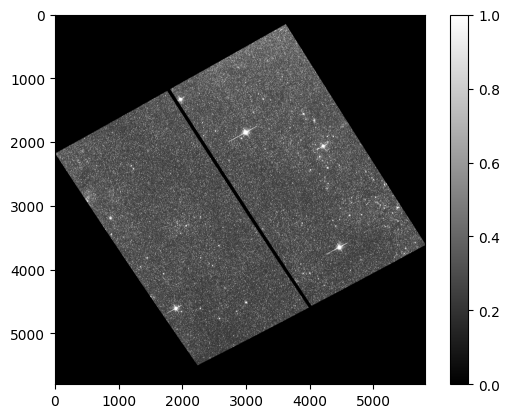

In [35]:
xz = (data).copy()
# fill nan with 0
xz[np.isnan(xz)] = 0
# nomalize the image with normalize(data, lower=0, upper=255)

xz = normalize(xz)
xz = (zscale(xz))
# descrip image with min max mean stdev


print('Min:', np.min(xz))
print('Max:', np.max(xz))
print('Mean:', np.mean(xz))
print('Stdev:', np.std(xz))

# plot the image
plt.imshow(xz, cmap="gray")
plt.colorbar()


In [31]:
xz = (data).copy()
# fill nan with 0
xz[np.isnan(xz)] = 0
# nomalize the image with normalize(data, lower=0, upper=255)
xz = normalize(xz)
# descrip image with min max mean stdev
print('Min:', np.min(xz))
print('Max:', np.max(xz))
print('Mean:', np.mean(xz))
print('Stdev:', np.std(xz))
xz = (zscale(xz))
xz

Min: 0.0
Max: 255.0
Mean: 1.2666558
Stdev: 2.9543617


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


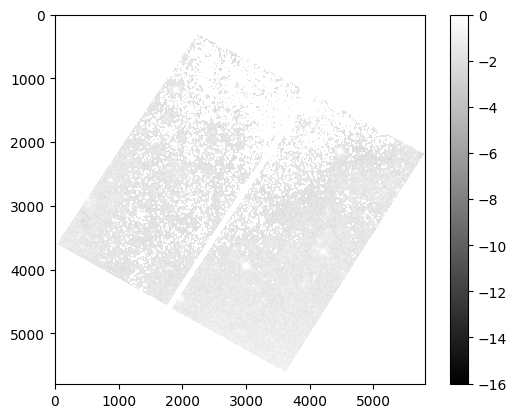

In [86]:
# display log base 2 scale image by flip vertical with inverte y-axis
zscale2 = ZScaleInterval()
imgY = np.flip((zscale2(data)), axis=0)
plt.imshow(np.log(imgY), cmap="gray")
plt.colorbar()


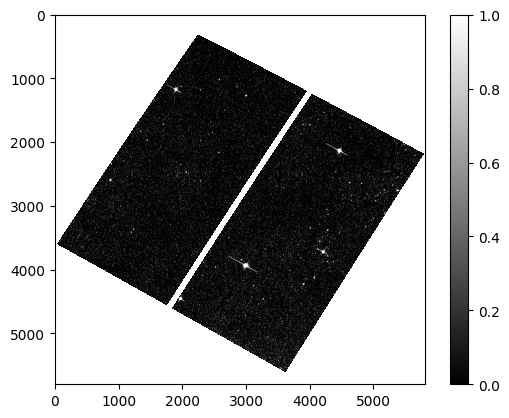

In [87]:
# display Power scale image by flip vertical with inverte y-axis
imgY = np.flip((zscale(data)), axis=0)
plt.imshow(np.power(imgY, 10), cmap="gray")
plt.colorbar()


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


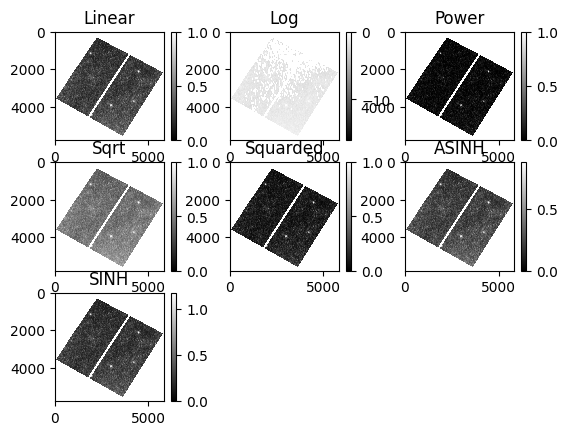

In [88]:
# display image by fillter such as Linear, Log, Power, Sqrt, Squarded, ASINH, SINH, ZScale scale image by flip vertical with inverte y-axis
img_old = np.flip(zscale(data), axis=0)
fillter_list = ['Linear', 'Log', 'Power', 'Sqrt', 'Squarded', 'ASINH', 'SINH']
for fillter in fillter_list:
    if fillter == 'Linear':
        img = img_old
    elif fillter == 'Log':
        img = np.log(img_old)
    elif fillter == 'Power':
        img = np.power(img_old, 10)
    elif fillter == 'Sqrt':
        img = np.sqrt(img_old)
    elif fillter == 'Squarded':
        img = np.square(img_old)
    elif fillter == 'ASINH':
        img = np.arcsinh(img_old)
    elif fillter == 'SINH':
        img = np.sinh(img_old)
    else:
        print('error')

    # plot 3 column 3 row and increase plot size follow by index
    plt.subplot(3, 3, fillter_list.index(fillter)+1)
    plt.imshow(img, cmap="gray")
    plt.colorbar()
    plt.title(fillter)

In [89]:
# display the image by flip vertical with inverte y-axis
# plt.imshow(zscale(data), cmap="gray", origin='lower')
# plt.colorbar()

In [4]:
# the image is saved in the same old resolution = len data in numpy array and display the image by flip vertical with inverte y-axis
def save_image(data, fillter, cm, fn):
    if fillter == 'Linear':
        data = data
    elif fillter == 'Log':
        data = np.log(data)
    elif fillter == 'Power':
        data = np.power(data, 10)
    elif fillter == 'Sqrt':
        data = np.sqrt(data)
    elif fillter == 'Squarded':
        data = np.square(data)
    elif fillter == 'ASINH':
        data = np.arcsinh(data)
    elif fillter == 'SINH':
        data = np.sinh(data)
    else:
        print('error')


    sizes = np.shape(data)
    height = float(sizes[0])
    width = float(sizes[1])
     
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
 
    ax.imshow(data, cmap=cm)
    plt.savefig(fn, dpi = height) 
    plt.close()

## make it with loop

In [20]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [21]:
files_name

['../../data/fits\\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits',
 '../../data/fits\\hst_10190_13_acs_wfc_f814w_j90o13_drc.fits',
 '../../data/fits\\hst_10190_28_acs_wfc_f814w_j90o28_drc.fits',
 '../../data/fits\\hst_14610_01_acs_wfc_f814w_jdb601_drc.fits',
 '../../data/fits\\hst_14610_02_acs_wfc_f814w_jdb602_drc.fits',
 '../../data/fits\\hst_14610_08_acs_wfc_f814w_jdb608_drc.fits',
 '../../data/fits\\hst_14610_12_acs_wfc_f814w_jdb612_drc.fits',
 '../../data/fits\\hst_14610_18_acs_wfc_f814w_jdb618_drc.fits',
 '../../data/fits\\hst_14610_23_acs_wfc_f814w_jdb623_drc.fits',
 '../../data/fits\\hst_14610_26_acs_wfc_f814w_jdb626_drc.fits',
 '../../data/fits\\hst_14610_27_acs_wfc_f814w_jdb627_drc.fits',
 '../../data/fits\\hst_14610_30_acs_wfc_f814w_jdb630_drc.fits',
 '../../data/fits\\hst_14610_32_acs_wfc_f814w_jdb632_drc.fits',
 '../../data/fits\\hst_14610_40_acs_wfc_f814w_jdb640_drc.fits',
 '../../data/fits\\hst_14610_44_acs_wfc_f814w_jdb644_drc.fits',
 '../../data/fits\\hst_14610_47_acs_wfc_

In [24]:
# create new name without path file from files_name by replace .fits to .jpg
files_name_jpg = [i.split('\\')[-1].replace('.fits', '.jpg') for i in files_name]
files_name_jpg

['hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 'hst_10190_13_acs_wfc_f814w_j90o13_drc.jpg',
 'hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 'hst_14610_01_acs_wfc_f814w_jdb601_drc.jpg',
 'hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 'hst_14610_08_acs_wfc_f814w_jdb608_drc.jpg',
 'hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg',
 'hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 'hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 'hst_14610_26_acs_wfc_f814w_jdb626_drc.jpg',
 'hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 'hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 'hst_14610_32_acs_wfc_f814w_jdb632_drc.jpg',
 'hst_14610_40_acs_wfc_f814w_jdb640_drc.jpg',
 'hst_14610_44_acs_wfc_f814w_jdb644_drc.jpg',
 'hst_14610_47_acs_wfc_f814w_jdb647_drc.jpg',
 'hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 'hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg',
 'hst_9873_03_acs_wfc_f814w_j8re03_drc.jpg',
 'hst_9873_06_acs_wfc_f814w_j8re06_drc.jpg']

In [26]:
# save the image by named with the file name by with out .fits
fillter_list = ['Linear', 'Log', 'Power', 'Sqrt', 'Squarded', 'ASINH', 'SINH']
for fillter in fillter_list:
    print('processing in {} fillter ...'.format(fillter))
    for i in range(len(files_name)):

        fits_file = files_name[i]
        data = fits.getdata(fits_file)

        zscale = ZScaleInterval()
        data = zscale(data)

        data = np.flipud(data)
        data = np.flip(data, axis=0) # this line is to flip the image follow the original image in DS9
       
        
        save_image(data, fillter,  'gray', "../../data/jpg/24_7filters_processing/{}/{}".format(fillter, files_name_jpg[i]))
    print('Done!')

processing in Linear fillter ...
Done!
processing in Log fillter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Done!
processing in Power fillter ...
Done!
processing in Sqrt fillter ...
Done!
processing in Squarded fillter ...
Done!
processing in ASINH fillter ...
Done!
processing in SINH fillter ...
Done!


## for testing set

In [7]:
test_path = '../../data/fits/testing_set/'
test_name = glob.glob(os.path.join(test_path, "*.fits"))

In [8]:
test_name

['../../data/fits/testing_set\\hst_14610_07_acs_wfc_f814w_jdb607_drc.fits',
 '../../data/fits/testing_set\\hst_14610_13_acs_wfc_f814w_jdb613_drc.fits',
 '../../data/fits/testing_set\\hst_14610_15_acs_wfc_f814w_jdb615_drc.fits',
 '../../data/fits/testing_set\\hst_14610_20_acs_wfc_f814w_jdb620_drc.fits',
 '../../data/fits/testing_set\\hst_14610_24_acs_wfc_f814w_jdb624_drc.fits',
 '../../data/fits/testing_set\\hst_14610_51_acs_wfc_f814w_jdb651_drc.fits']

In [9]:
# create new name without path file from files_name by replace .fits to .jpg
files_name_jpg = [i.split('\\')[-1].replace('.fits', '.jpg') for i in test_name]
files_name_jpg

['hst_14610_07_acs_wfc_f814w_jdb607_drc.jpg',
 'hst_14610_13_acs_wfc_f814w_jdb613_drc.jpg',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc.jpg',
 'hst_14610_20_acs_wfc_f814w_jdb620_drc.jpg',
 'hst_14610_24_acs_wfc_f814w_jdb624_drc.jpg',
 'hst_14610_51_acs_wfc_f814w_jdb651_drc.jpg']

In [10]:
# save the image by named with the file name by with out .fits
# fillter_list = ['Linear', 'Log', 'Power', 'Sqrt', 'Squarded', 'ASINH', 'SINH']
fillter_list = ['Squarded', 'ASINH', 'SINH']
for fillter in fillter_list:
    print('processing in {} fillter ...'.format(fillter))
    for i in range(len(test_name)):

        fits_file = test_name[i]
        data = fits.getdata(fits_file)

        zscale = ZScaleInterval()
        data = zscale(data)

        data = np.flipud(data)
        data = np.flip(data, axis=0) # this line is to flip the image follow the original image in DS9
       
        
        save_image(data, fillter,  'gray', "../../data/jpg/24_7filters_processing/testing_set/{}/{}".format(fillter, files_name_jpg[i]))
    print('Done!')

processing in Squarded fillter ...
Done!
processing in ASINH fillter ...
Done!
processing in SINH fillter ...
Done!


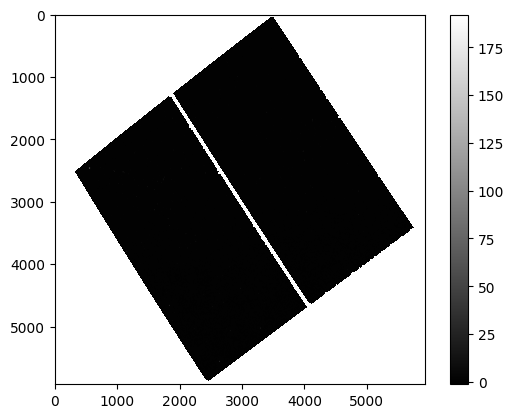

In [5]:
# show test image
d = fits.getdata('../../data/fits/testing_set/hst_14610_07_acs_wfc_f814w_jdb607_drc.fits')
plt.imshow(d, cmap="gray")
plt.colorbar()
